# Baseball Statistics: Teams

Baseball is a game full of statistics, and most of those statistics have been consistently and carefully tracked going back to the late 1800s. That makes professional baseball a playground for data analysts. Here I look at interesting correlations between players, their stats, and their salaries.

**Data Source:** [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/). The data set I used was through the 2018 season.

Copyright © 2019 Ken Norton (ken@kennethnorton.com)

In [15]:
%run ./1_Data_Preparation.ipynb

Let's take a look at the Teams table. Here are the individual columns:

```
yearID         Year
lgID           League
teamID         Team
franchID       Franchise (links to TeamsFranchise table)
divID          Team's division
Rank           Position in final standings
G              Games played
GHome          Games played at home
W              Wins
L              Losses
DivWin         Division Winner (Y or N)
WCWin          Wild Card Winner (Y or N)
LgWin          League Champion(Y or N)
WSWin          World Series Winner (Y or N)
R              Runs scored
AB             At bats
H              Hits by batters
2B             Doubles
3B             Triples
HR             Homeruns by batters
BB             Walks by batters
SO             Strikeouts by batters
SB             Stolen bases
CS             Caught stealing
HBP            Batters hit by pitch
SF             Sacrifice flies
RA             Opponents runs scored
ER             Earned runs allowed
ERA            Earned run average
CG             Complete games
SHO            Shutouts
SV             Saves
IPOuts         Outs Pitched (innings pitched x 3)
HA             Hits allowed
HRA            Homeruns allowed
BBA            Walks allowed
SOA            Strikeouts by pitchers
E              Errors
DP             Double Plays
FP             Fielding  percentage
name           Team's full name
park           Name of team's home ballpark
attendance     Home attendance total
BPF            Three-year park factor for batters
PPF            Three-year park factor for pitchers
teamIDBR       Team ID used by Baseball Reference website
teamIDlahman45 Team ID used in Lahman database version 4.5
teamIDretro    Team ID used by Retrosheet
```

In [16]:
teams.describe()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
count,2895.000000,2895.000000,2895.000000,2496.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2894.000000,2879.000000,2769.000000,2063.000000,1737.000000,1354.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2.616000e+03,2895.000000,2895.000000
mean,1956.963040,4.072539,150.692919,78.556891,74.942314,74.942314,683.611744,5154.547496,1347.913644,229.140933,46.506736,103.967530,475.229440,751.031956,111.022391,47.691226,45.364421,45.047267,683.610708,574.138860,3.823174,48.980656,9.685665,24.216235,4032.811744,1347.686356,103.967530,475.424870,750.522971,184.138860,133.539551,0.965802,1.380458e+06,100.194128,100.217271
std,42.260337,2.308810,22.968790,4.638081,17.530459,17.274056,134.572259,741.546183,216.989317,58.673209,22.260486,62.781245,130.915516,308.694949,70.055574,21.573868,17.689532,9.231481,134.023139,146.963575,0.762745,39.056428,5.032649,16.351810,623.227983,216.955229,59.625974,130.396145,309.842690,108.208599,35.302549,0.029347,9.578068e+05,4.919002,4.846016
min,1871.000000,1.000000,6.000000,44.000000,0.000000,4.000000,24.000000,211.000000,33.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,3.000000,7.000000,18.000000,34.000000,23.000000,1.220000,0.000000,0.000000,0.000000,162.000000,49.000000,0.000000,1.000000,0.000000,47.000000,0.000000,0.761000,6.088000e+03,60.000000,60.000000
25%,1921.000000,2.000000,154.000000,77.000000,66.000000,66.000000,615.000000,5142.000000,1303.000000,195.000000,30.000000,43.000000,427.000000,513.500000,64.000000,34.000000,32.000000,39.000000,611.000000,504.000000,3.360000,11.000000,6.000000,9.000000,4080.000000,1290.500000,49.000000,430.000000,506.500000,114.000000,117.000000,0.965000,5.447818e+05,97.000000,97.000000
50%,1965.000000,4.000000,158.000000,81.000000,77.000000,76.000000,691.000000,5404.000000,1393.000000,233.000000,41.000000,109.000000,494.000000,755.000000,94.000000,45.000000,43.000000,45.000000,689.000000,594.000000,3.830000,43.000000,9.000000,25.000000,4251.000000,1392.000000,112.000000,496.000000,754.000000,143.000000,141.000000,0.977000,1.185781e+06,100.000000,100.000000
75%,1994.000000,6.000000,162.000000,81.000000,87.000000,87.000000,764.000000,5520.500000,1466.000000,272.000000,59.000000,153.000000,554.000000,980.500000,139.000000,57.000000,56.000000,51.000000,765.500000,669.000000,4.310000,77.000000,13.000000,38.000000,4342.000000,1470.000000,152.000000,554.000000,985.500000,212.000000,157.000000,0.981000,2.065338e+06,103.000000,103.000000
max,2018.000000,13.000000,165.000000,84.000000,116.000000,134.000000,1220.000000,5781.000000,1783.000000,376.000000,150.000000,267.000000,835.000000,1594.000000,581.000000,191.000000,160.000000,77.000000,1252.000000,1023.000000,8.000000,148.000000,32.000000,68.000000,4518.000000,1993.000000,258.000000,827.000000,1687.000000,639.000000,217.000000,0.991000,4.483350e+06,129.000000,141.000000


(array([ 12.,  11.,   4.,  12.,  13.,   6.,  21.,  21.,  33.,  48.,  61.,
        111., 132., 164., 279., 310., 300., 357., 364., 251., 227., 108.,
         35.,  12.,   3.]),
 array([  0.  ,   4.64,   9.28,  13.92,  18.56,  23.2 ,  27.84,  32.48,
         37.12,  41.76,  46.4 ,  51.04,  55.68,  60.32,  64.96,  69.6 ,
         74.24,  78.88,  83.52,  88.16,  92.8 ,  97.44, 102.08, 106.72,
        111.36, 116.  ]),
 <a list of 25 Patch objects>)

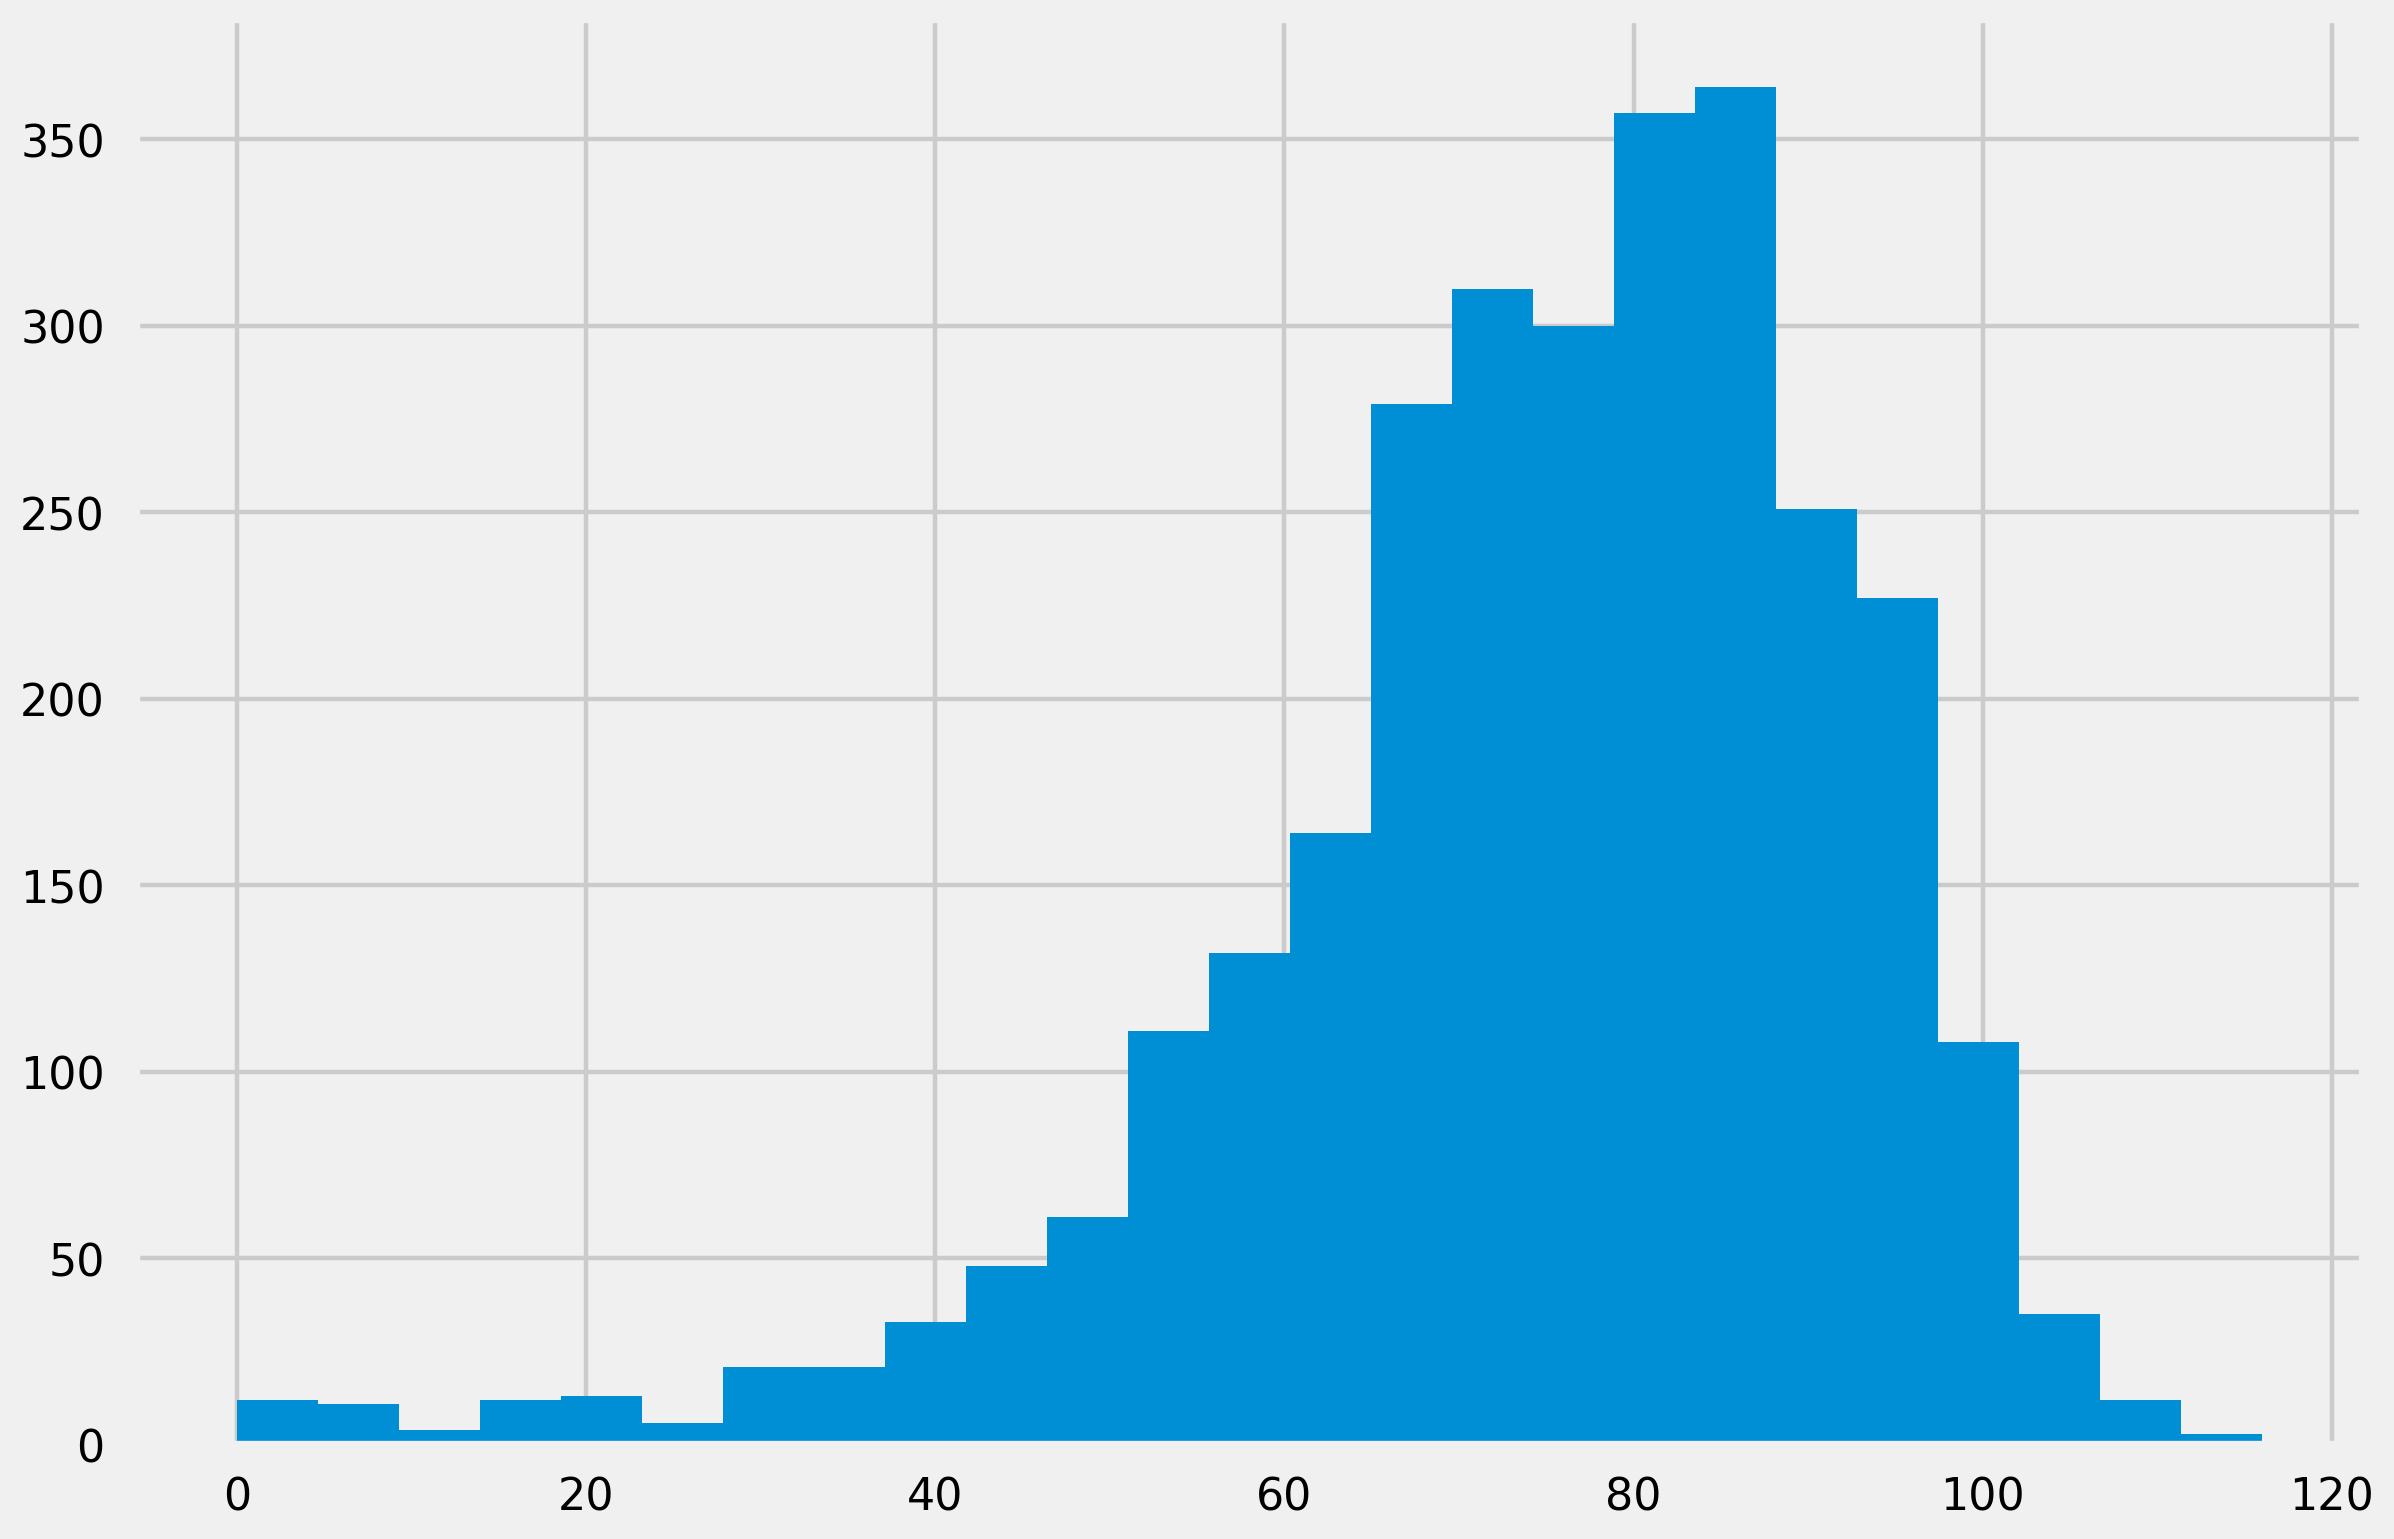

In [17]:
plt.hist(teams['W'], bins=25)

(array([  8.,   8.,  20.,  12.,  15.,  22.,  34.,  45.,  65.,  71., 210.,
        258., 325., 395., 338., 396., 269., 199., 116.,  57.,  26.,   3.,
          2.,   0.,   1.]),
 array([  4. ,   9.2,  14.4,  19.6,  24.8,  30. ,  35.2,  40.4,  45.6,
         50.8,  56. ,  61.2,  66.4,  71.6,  76.8,  82. ,  87.2,  92.4,
         97.6, 102.8, 108. , 113.2, 118.4, 123.6, 128.8, 134. ]),
 <a list of 25 Patch objects>)

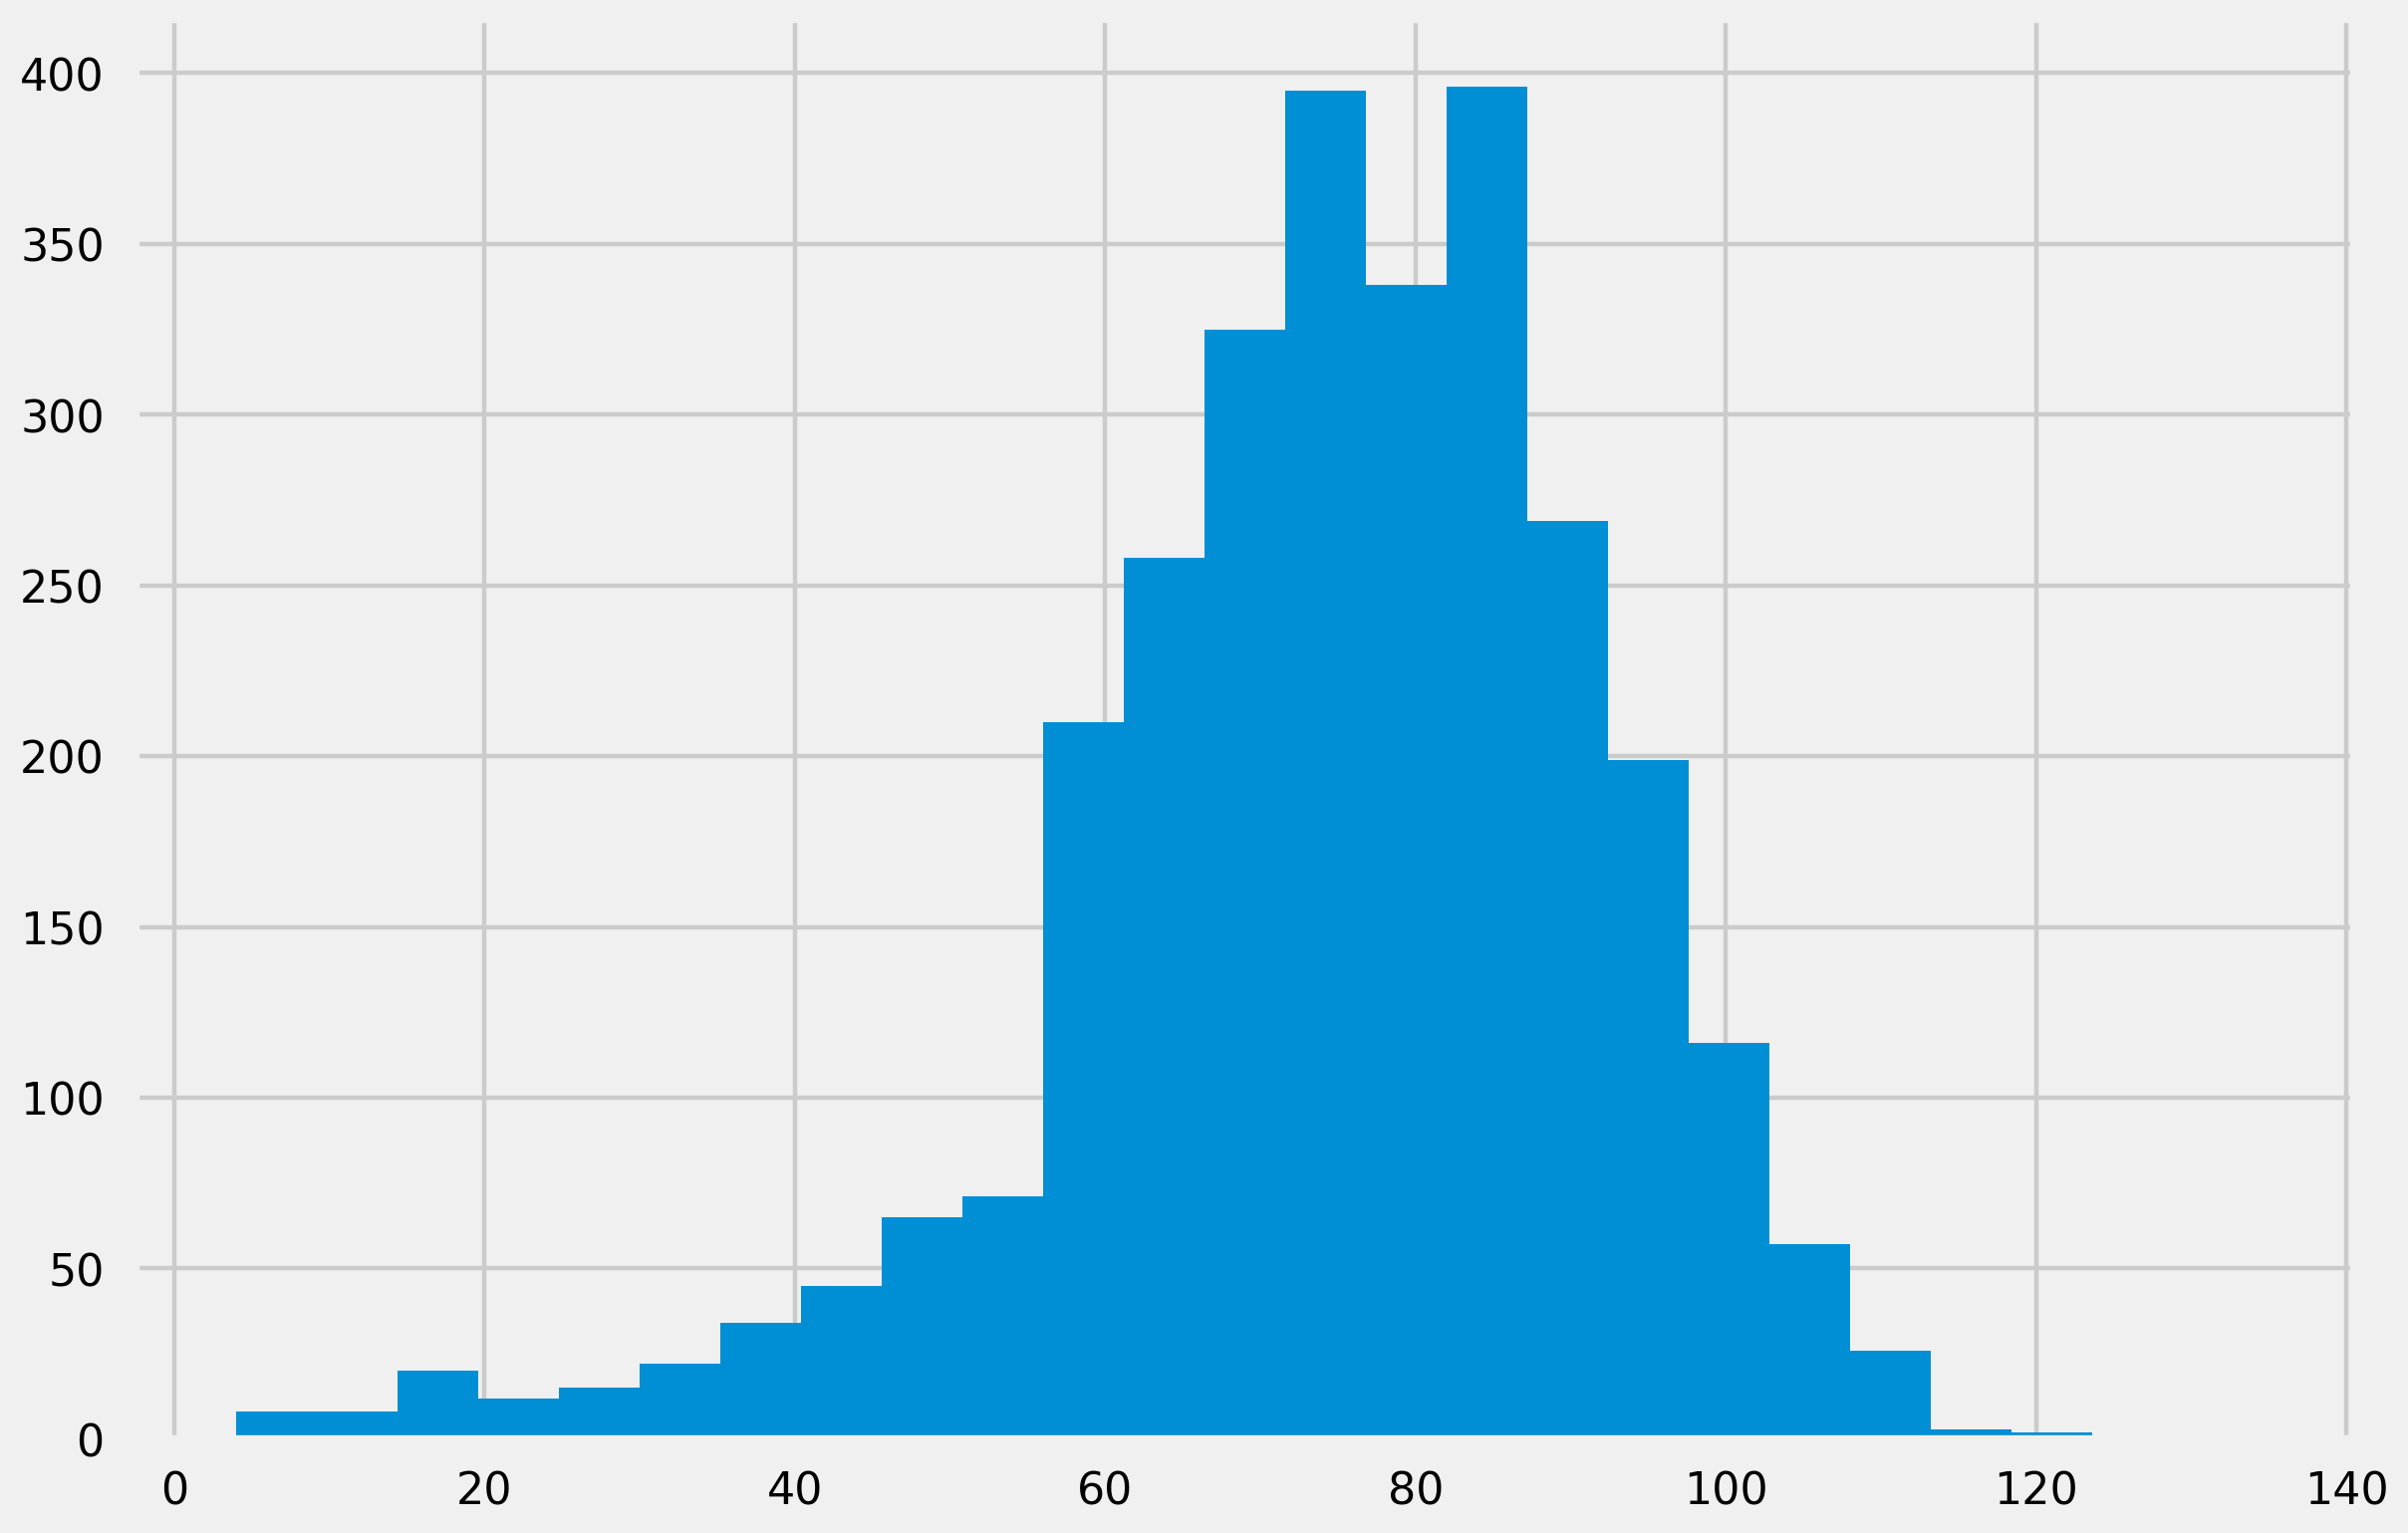

In [18]:
plt.hist(teams['L'], bins=25)

In [19]:
teams['Win_Pct'] = teams['W'] / (teams['W'] + teams['L'])

(array([  2.,   1.,   3.,   4.,   5.,   8.,  13.,  24.,  42., 106., 155.,
        271., 381., 426., 450., 430., 306., 152.,  69.,  30.,   9.,   4.,
          1.,   2.,   1.]),
 array([0.        , 0.03594937, 0.07189873, 0.1078481 , 0.14379747,
        0.17974684, 0.2156962 , 0.25164557, 0.28759494, 0.3235443 ,
        0.35949367, 0.39544304, 0.43139241, 0.46734177, 0.50329114,
        0.53924051, 0.57518987, 0.61113924, 0.64708861, 0.68303797,
        0.71898734, 0.75493671, 0.79088608, 0.82683544, 0.86278481,
        0.89873418]),
 <a list of 25 Patch objects>)

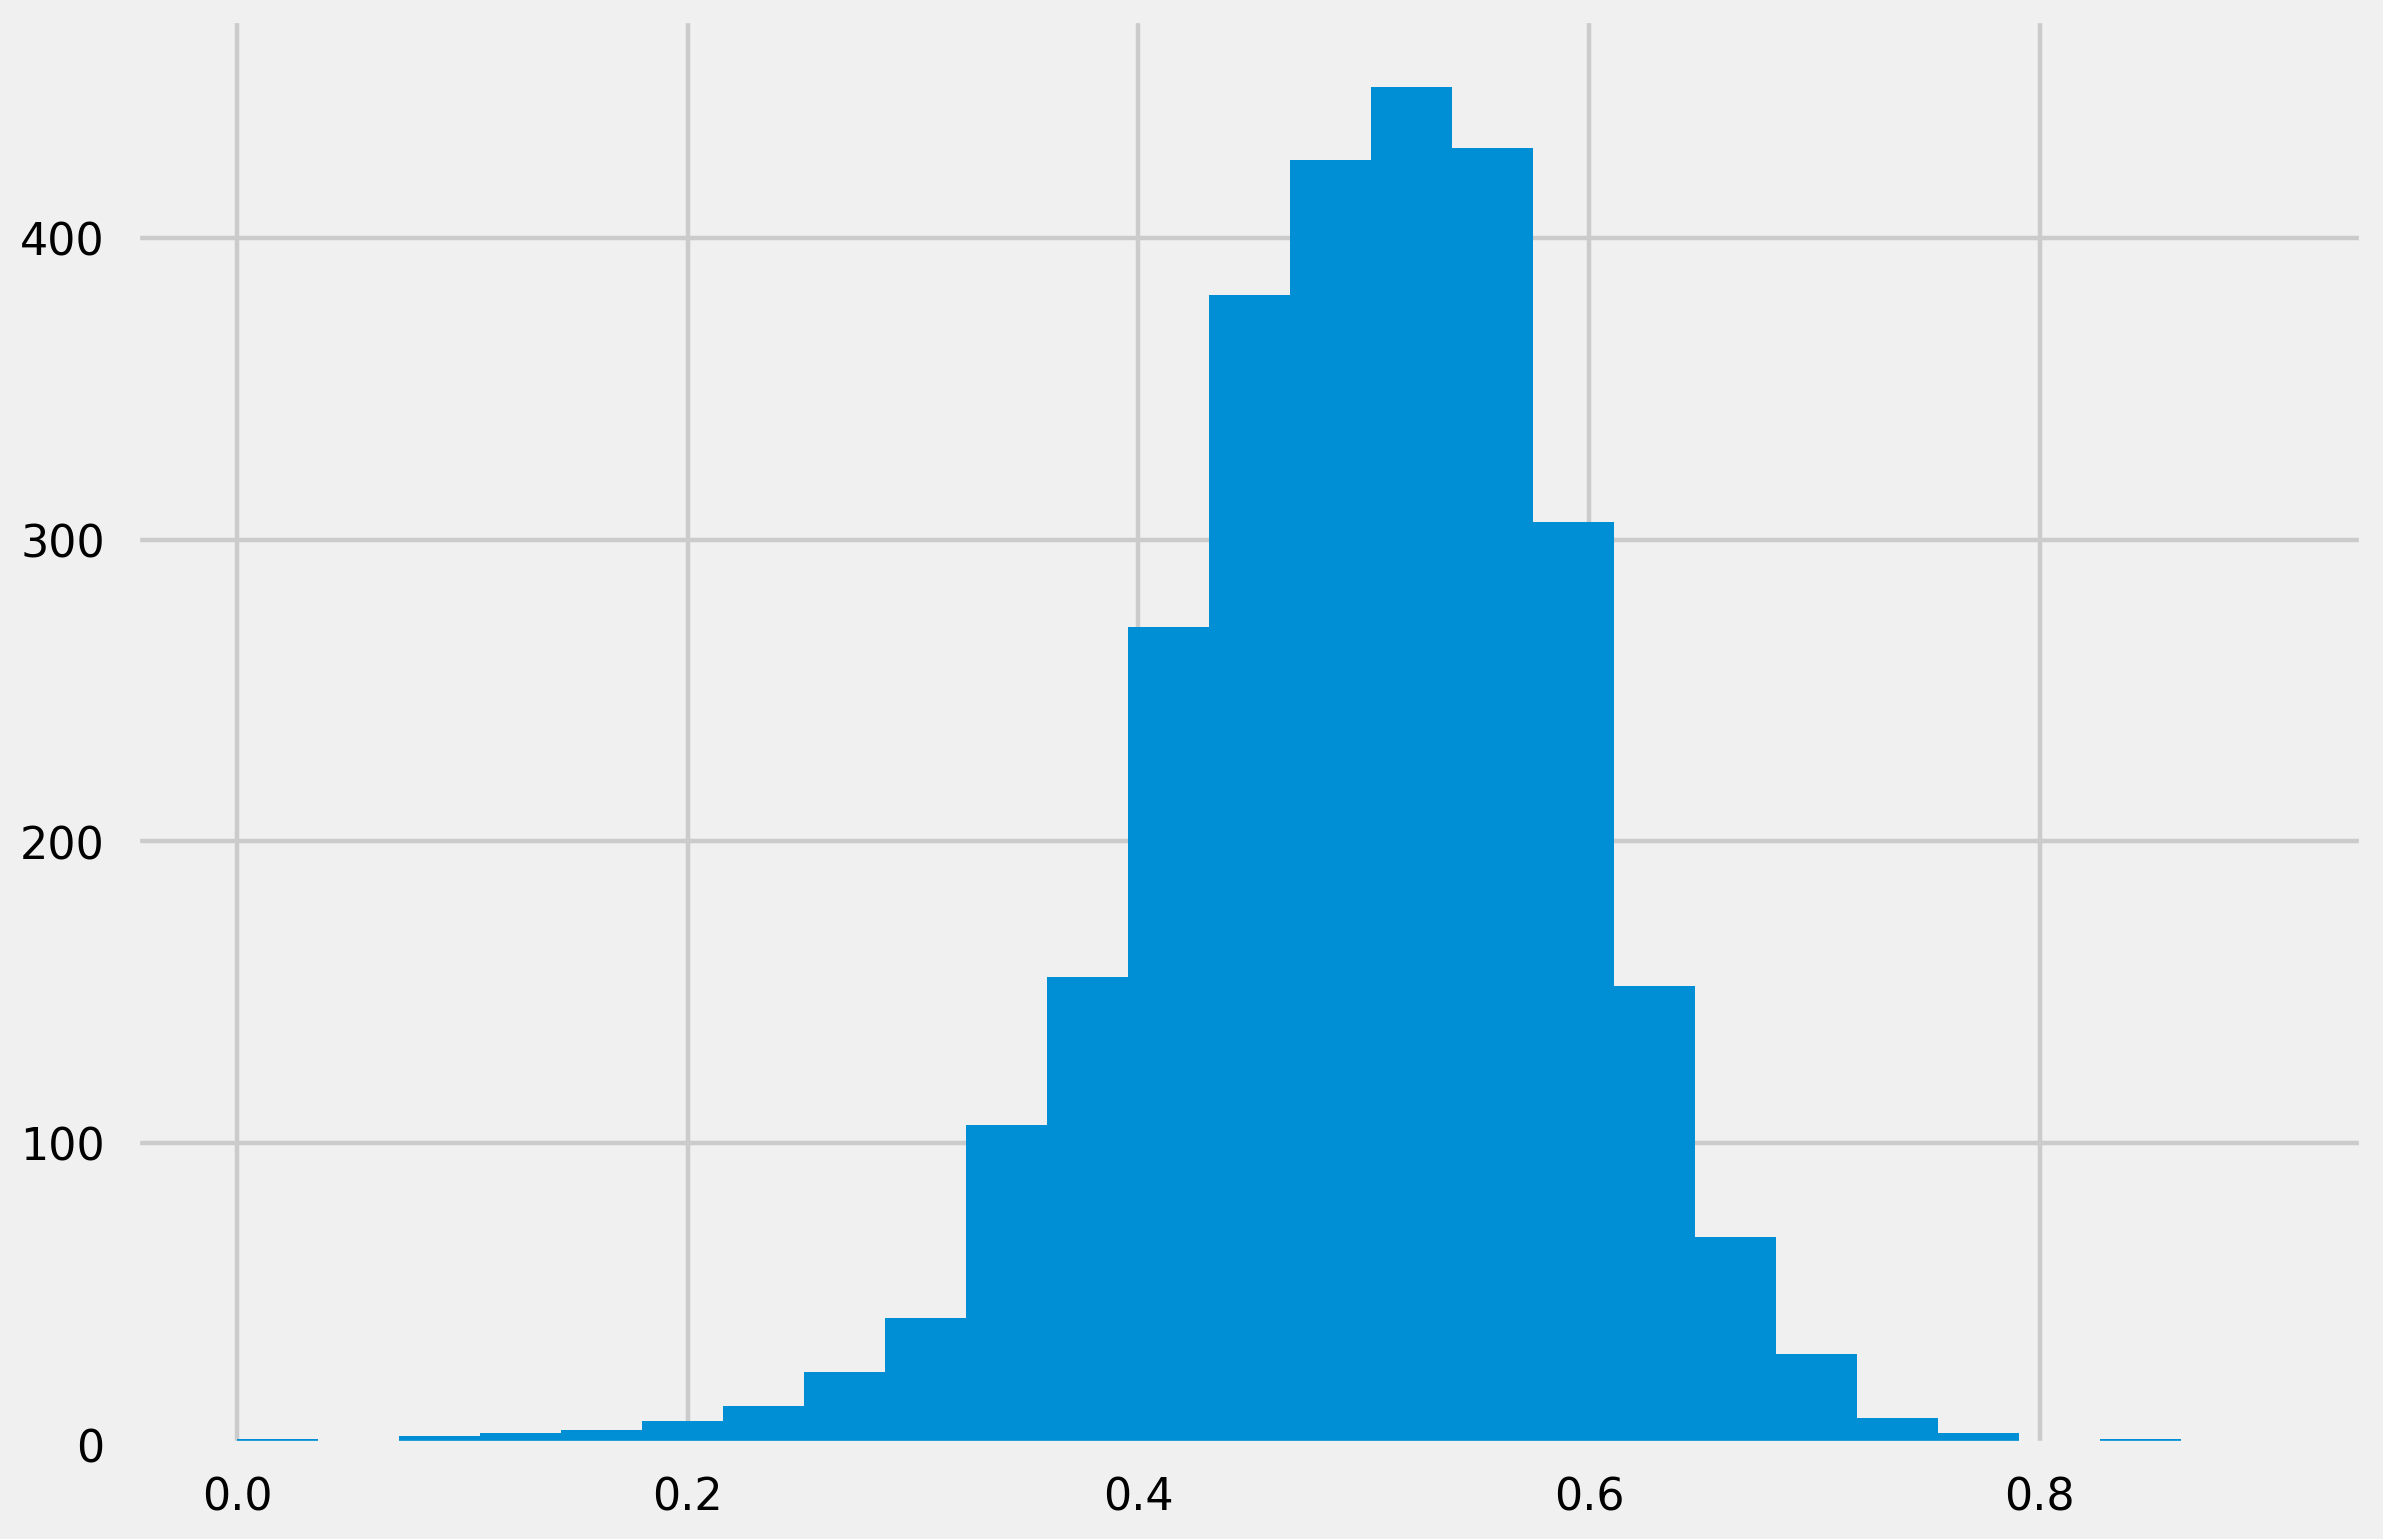

In [20]:
plt.hist(teams['Win_Pct'], bins=25)

### San Francisco Giants

The Giants are my favorite team, so I've decided to do some analysis of their stats over the years.

In [21]:
# Teams are identified both with teamIDs and franchID (franchise IDs). The San Francisco Giants were 
# originally the New York Giants. If we selected only data with the SFN teamID, we'd miss out on 
# all of the stats from their years in NY. I want the full franchise history, so I'm going to filter 
# on franchID
sfg = teams[teams['franchID'] == 'SFG']
sfg.teamID.unique()
plt.style.use('dark_background')

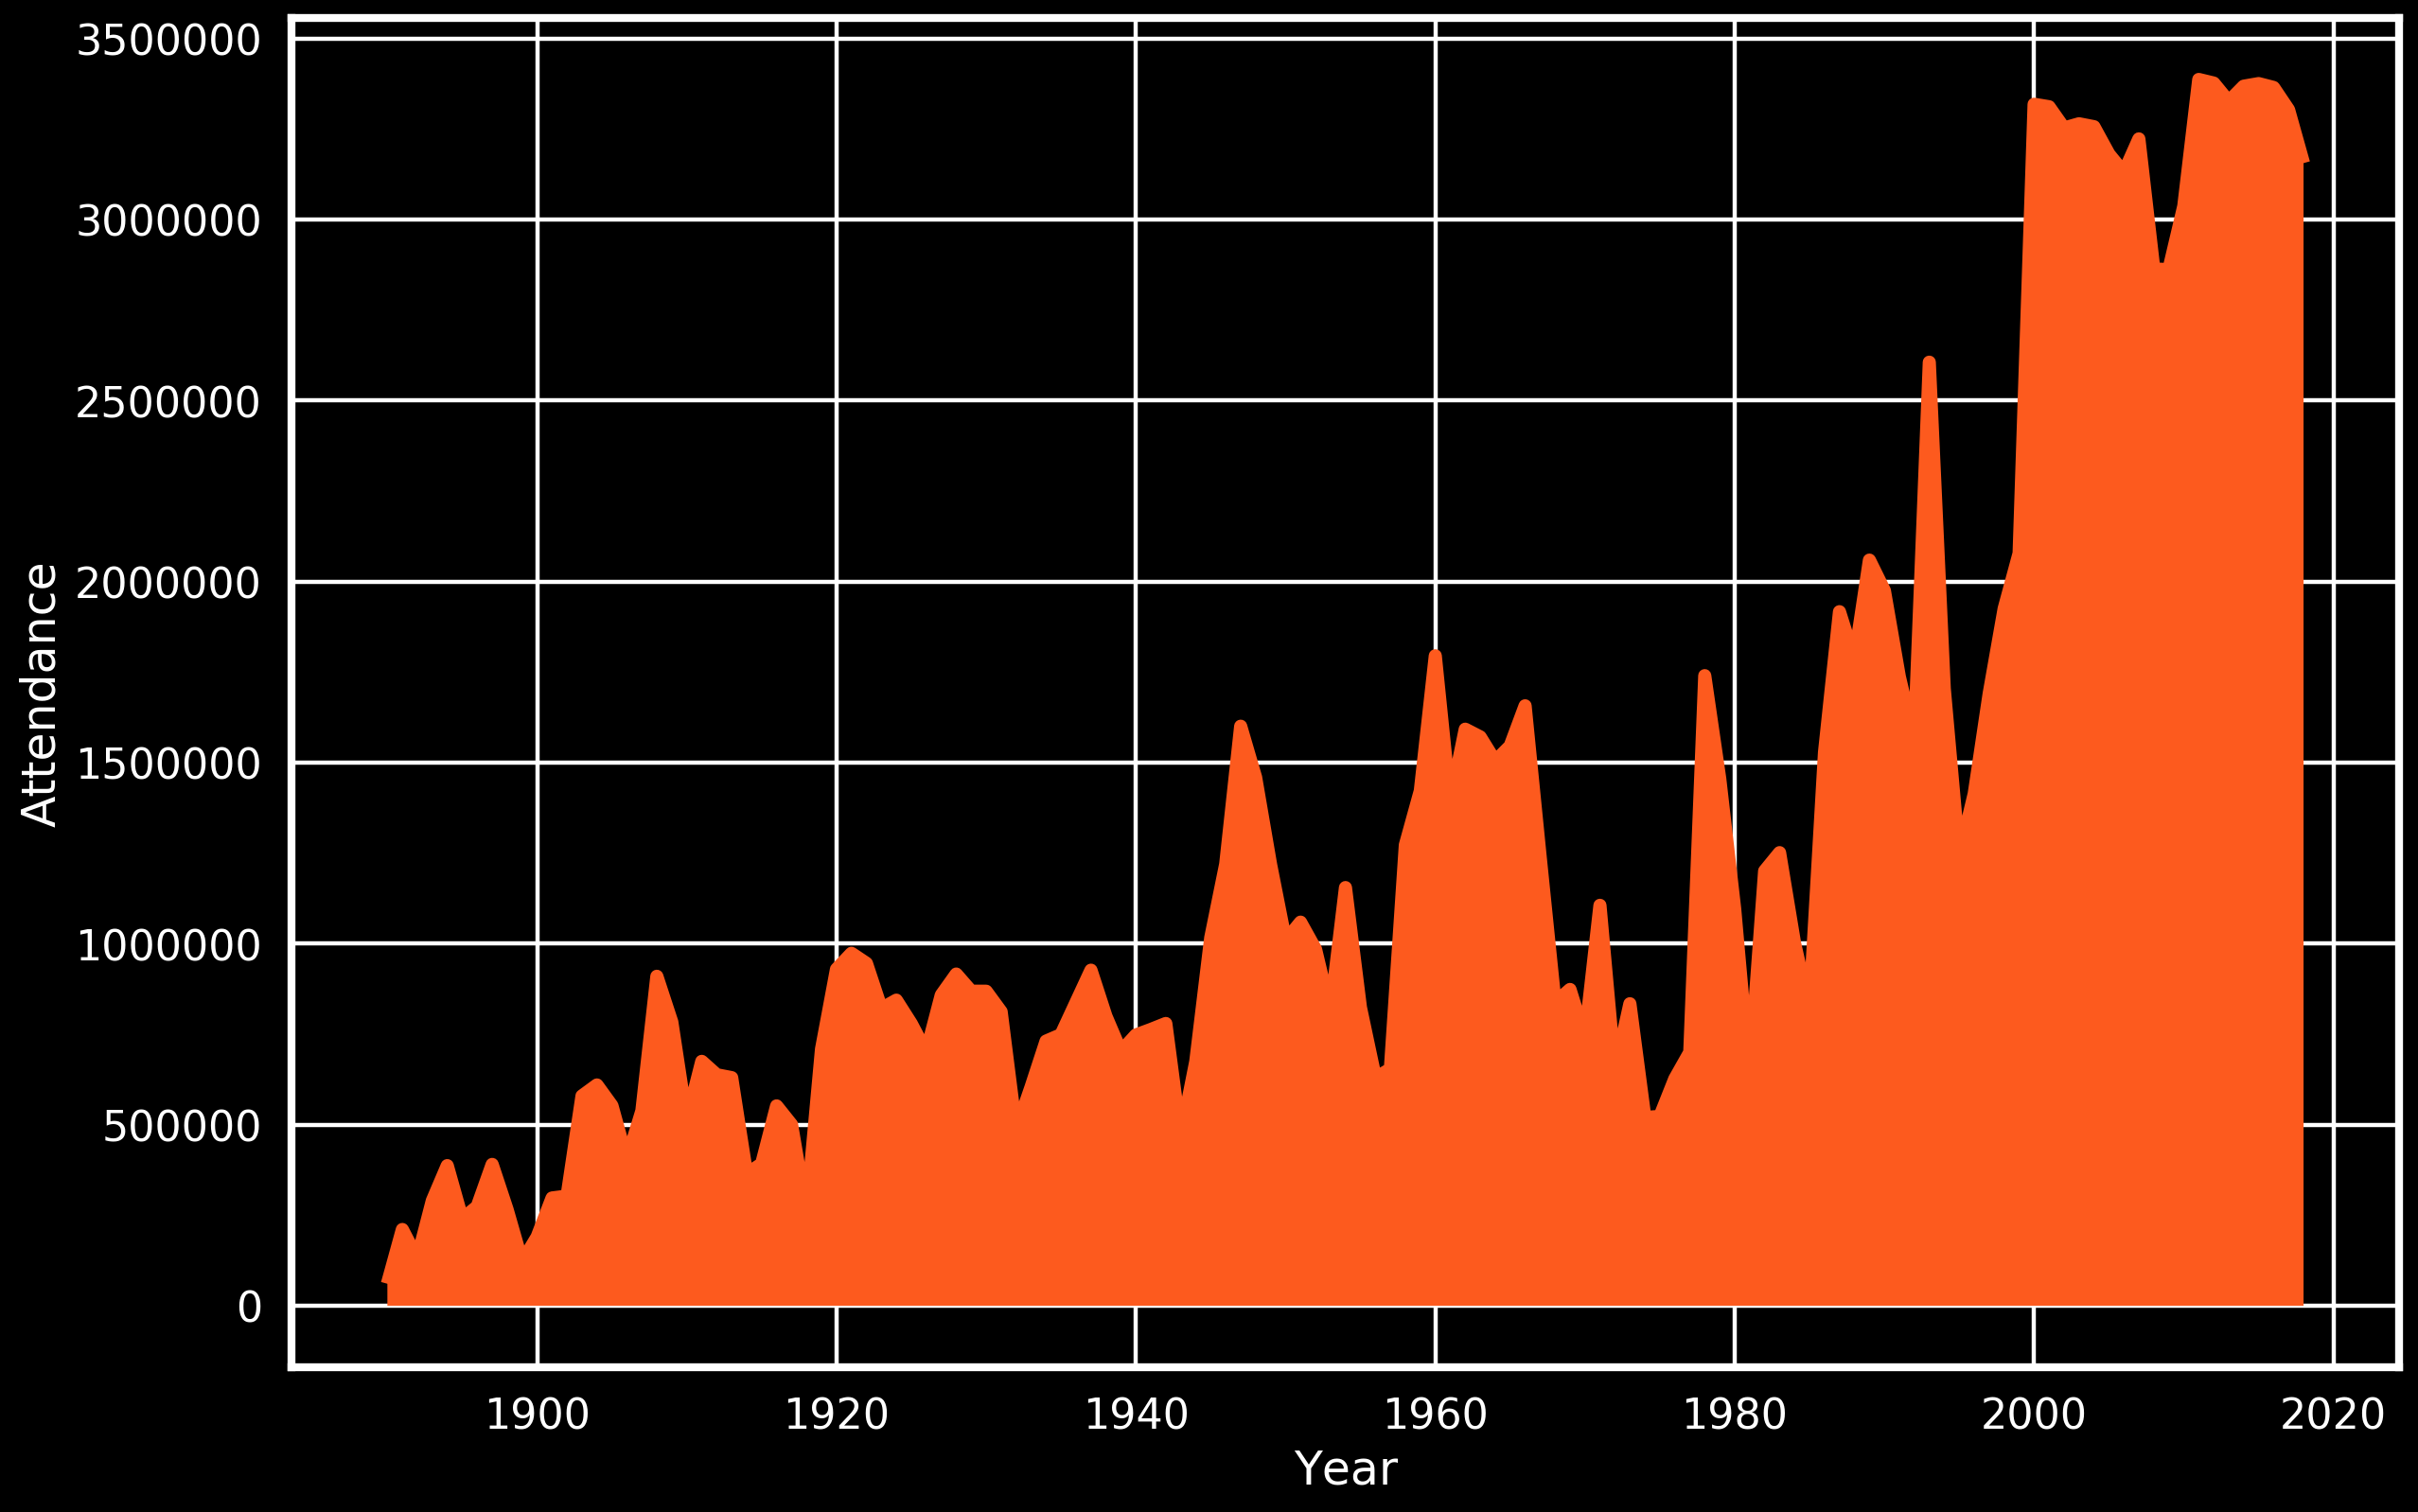

In [22]:
sfgplot(sfg['yearID'], sfg['attendance'], "Year", "Attendance")

It's cool that the data include attendance numbers. With the Giants, you can see the year they moved into their new stadium in San Franciso (2000) as well as their record-breaking attendance numbers since then, including through three World Series titles in 2010, 2012, and 2014.

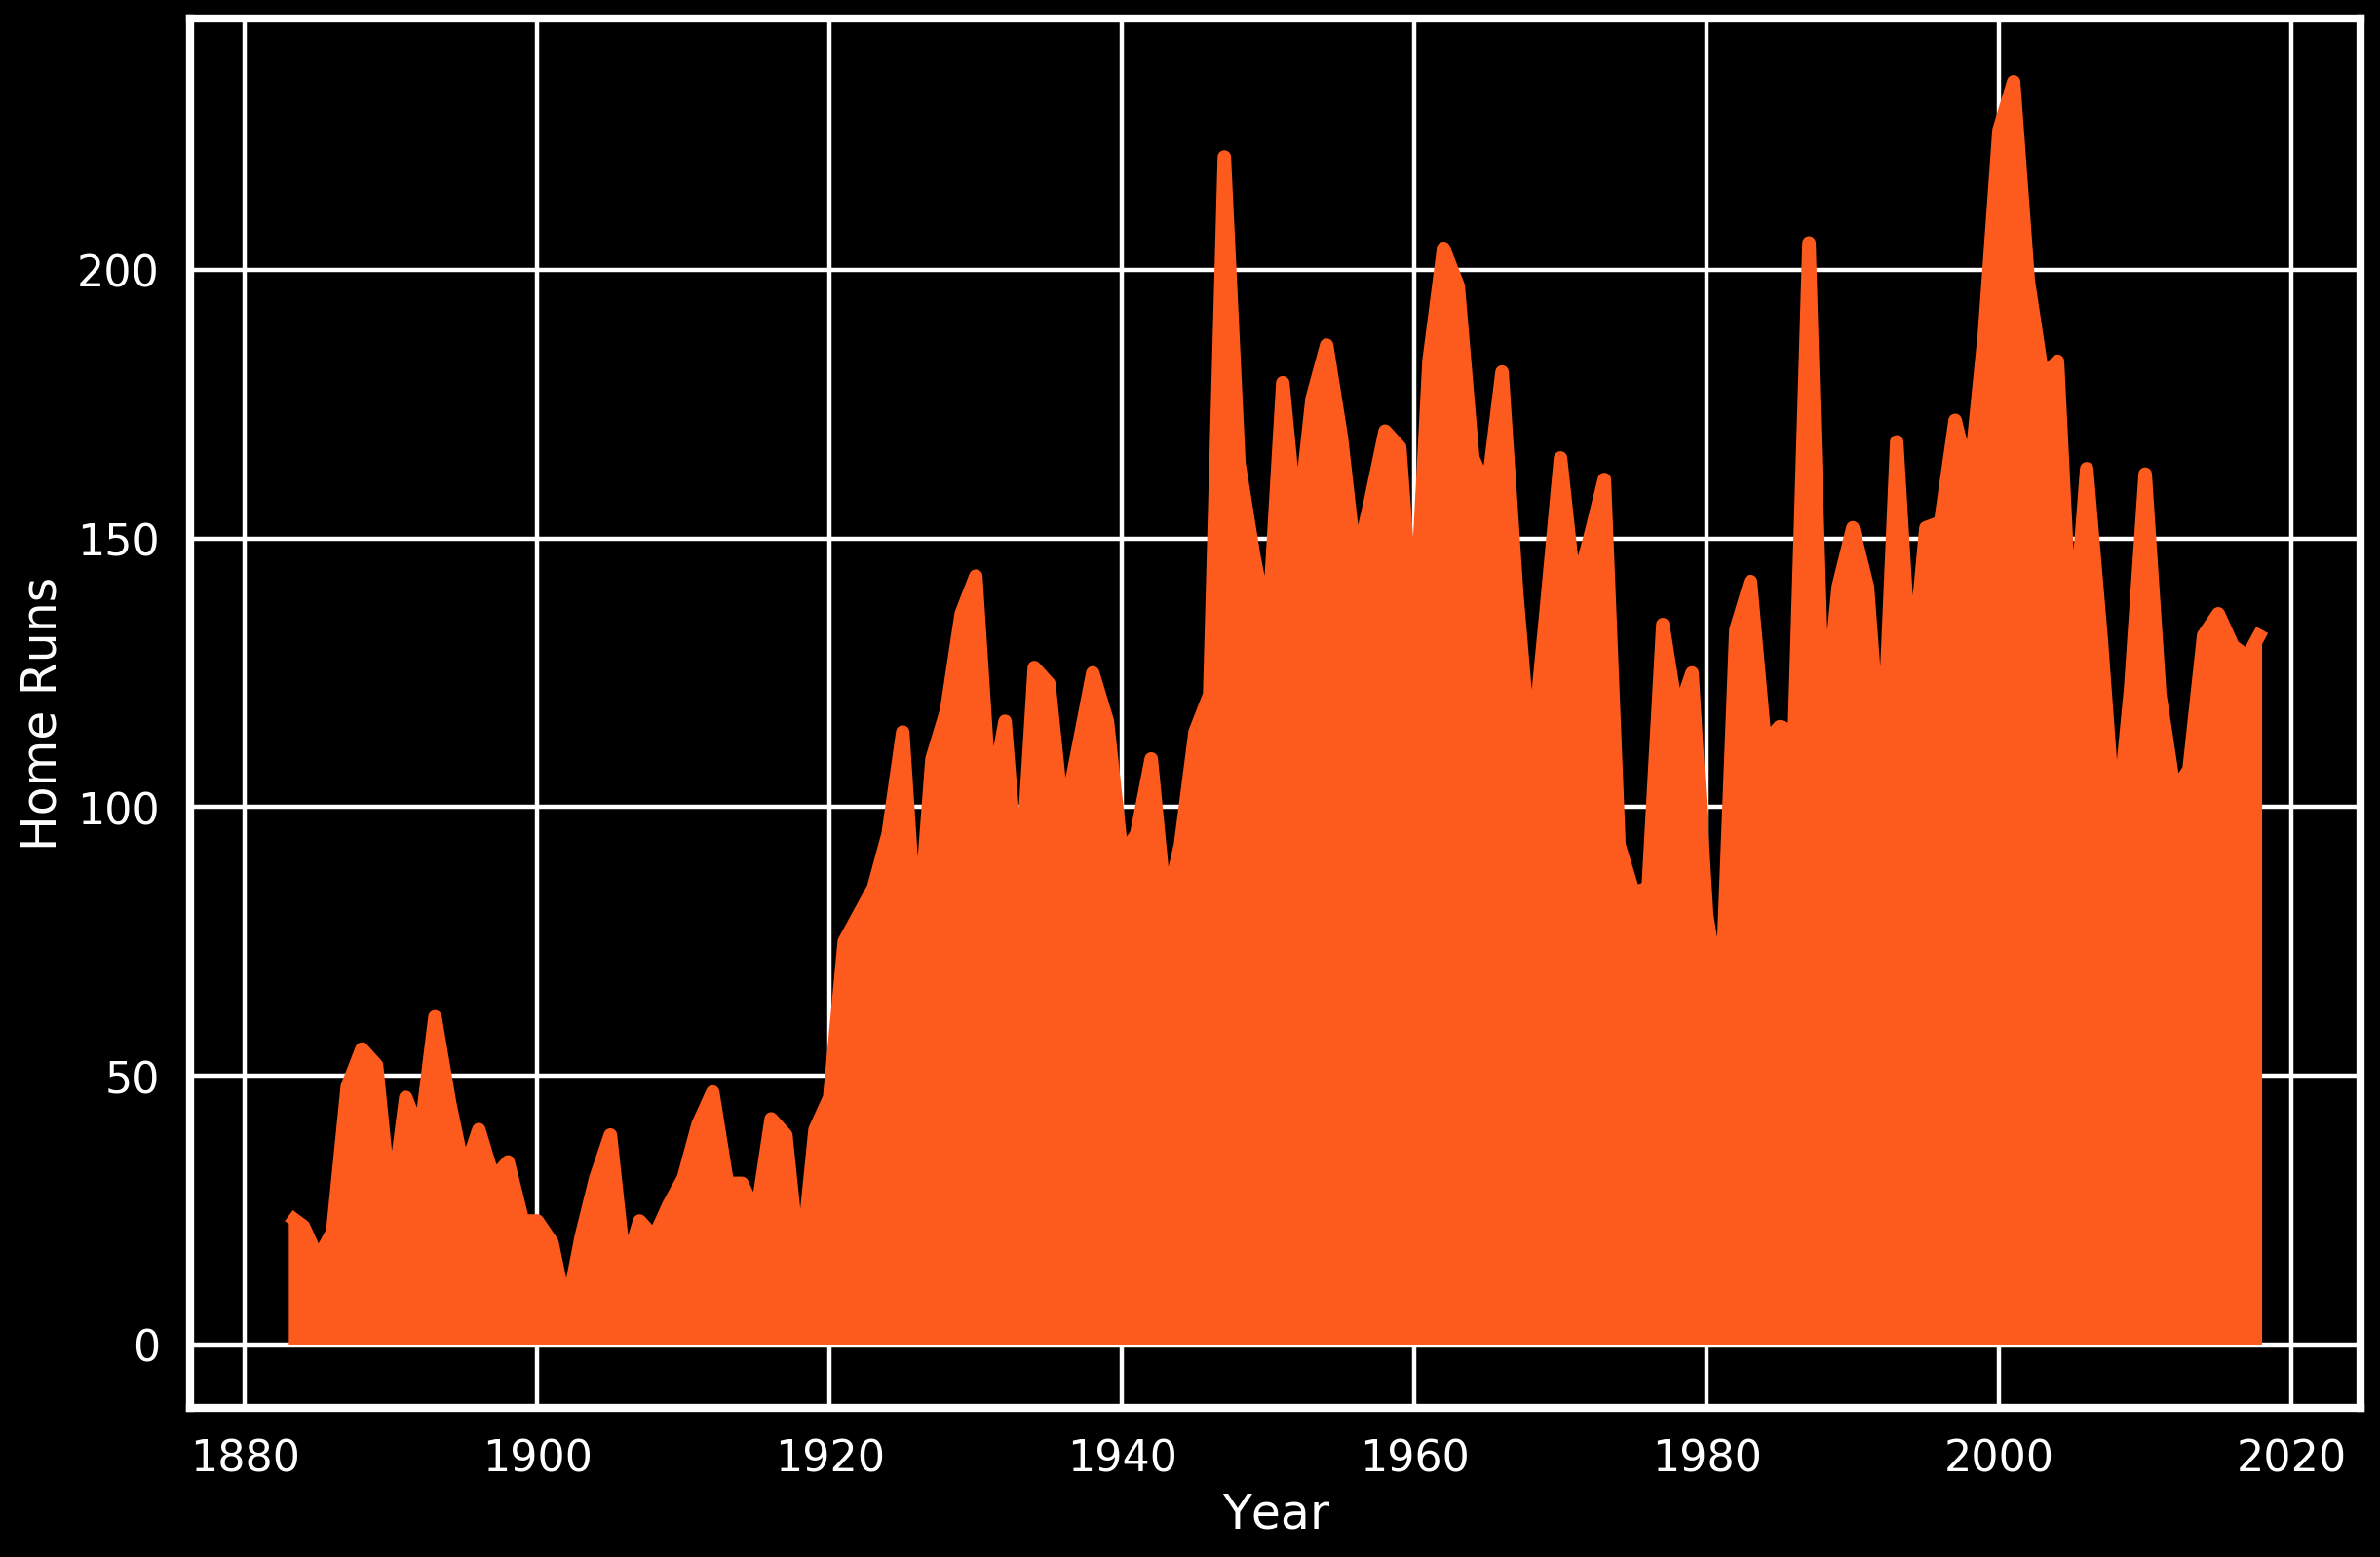

In [23]:
sfgplot(sfg['yearID'], sfg['HR'], "Year", "Home Runs")

Unsurprisingly, when you look at Giants home run totals throughout history you can clearly see Barry Bonds record-breaking years in the late 1990s/early 2000s.

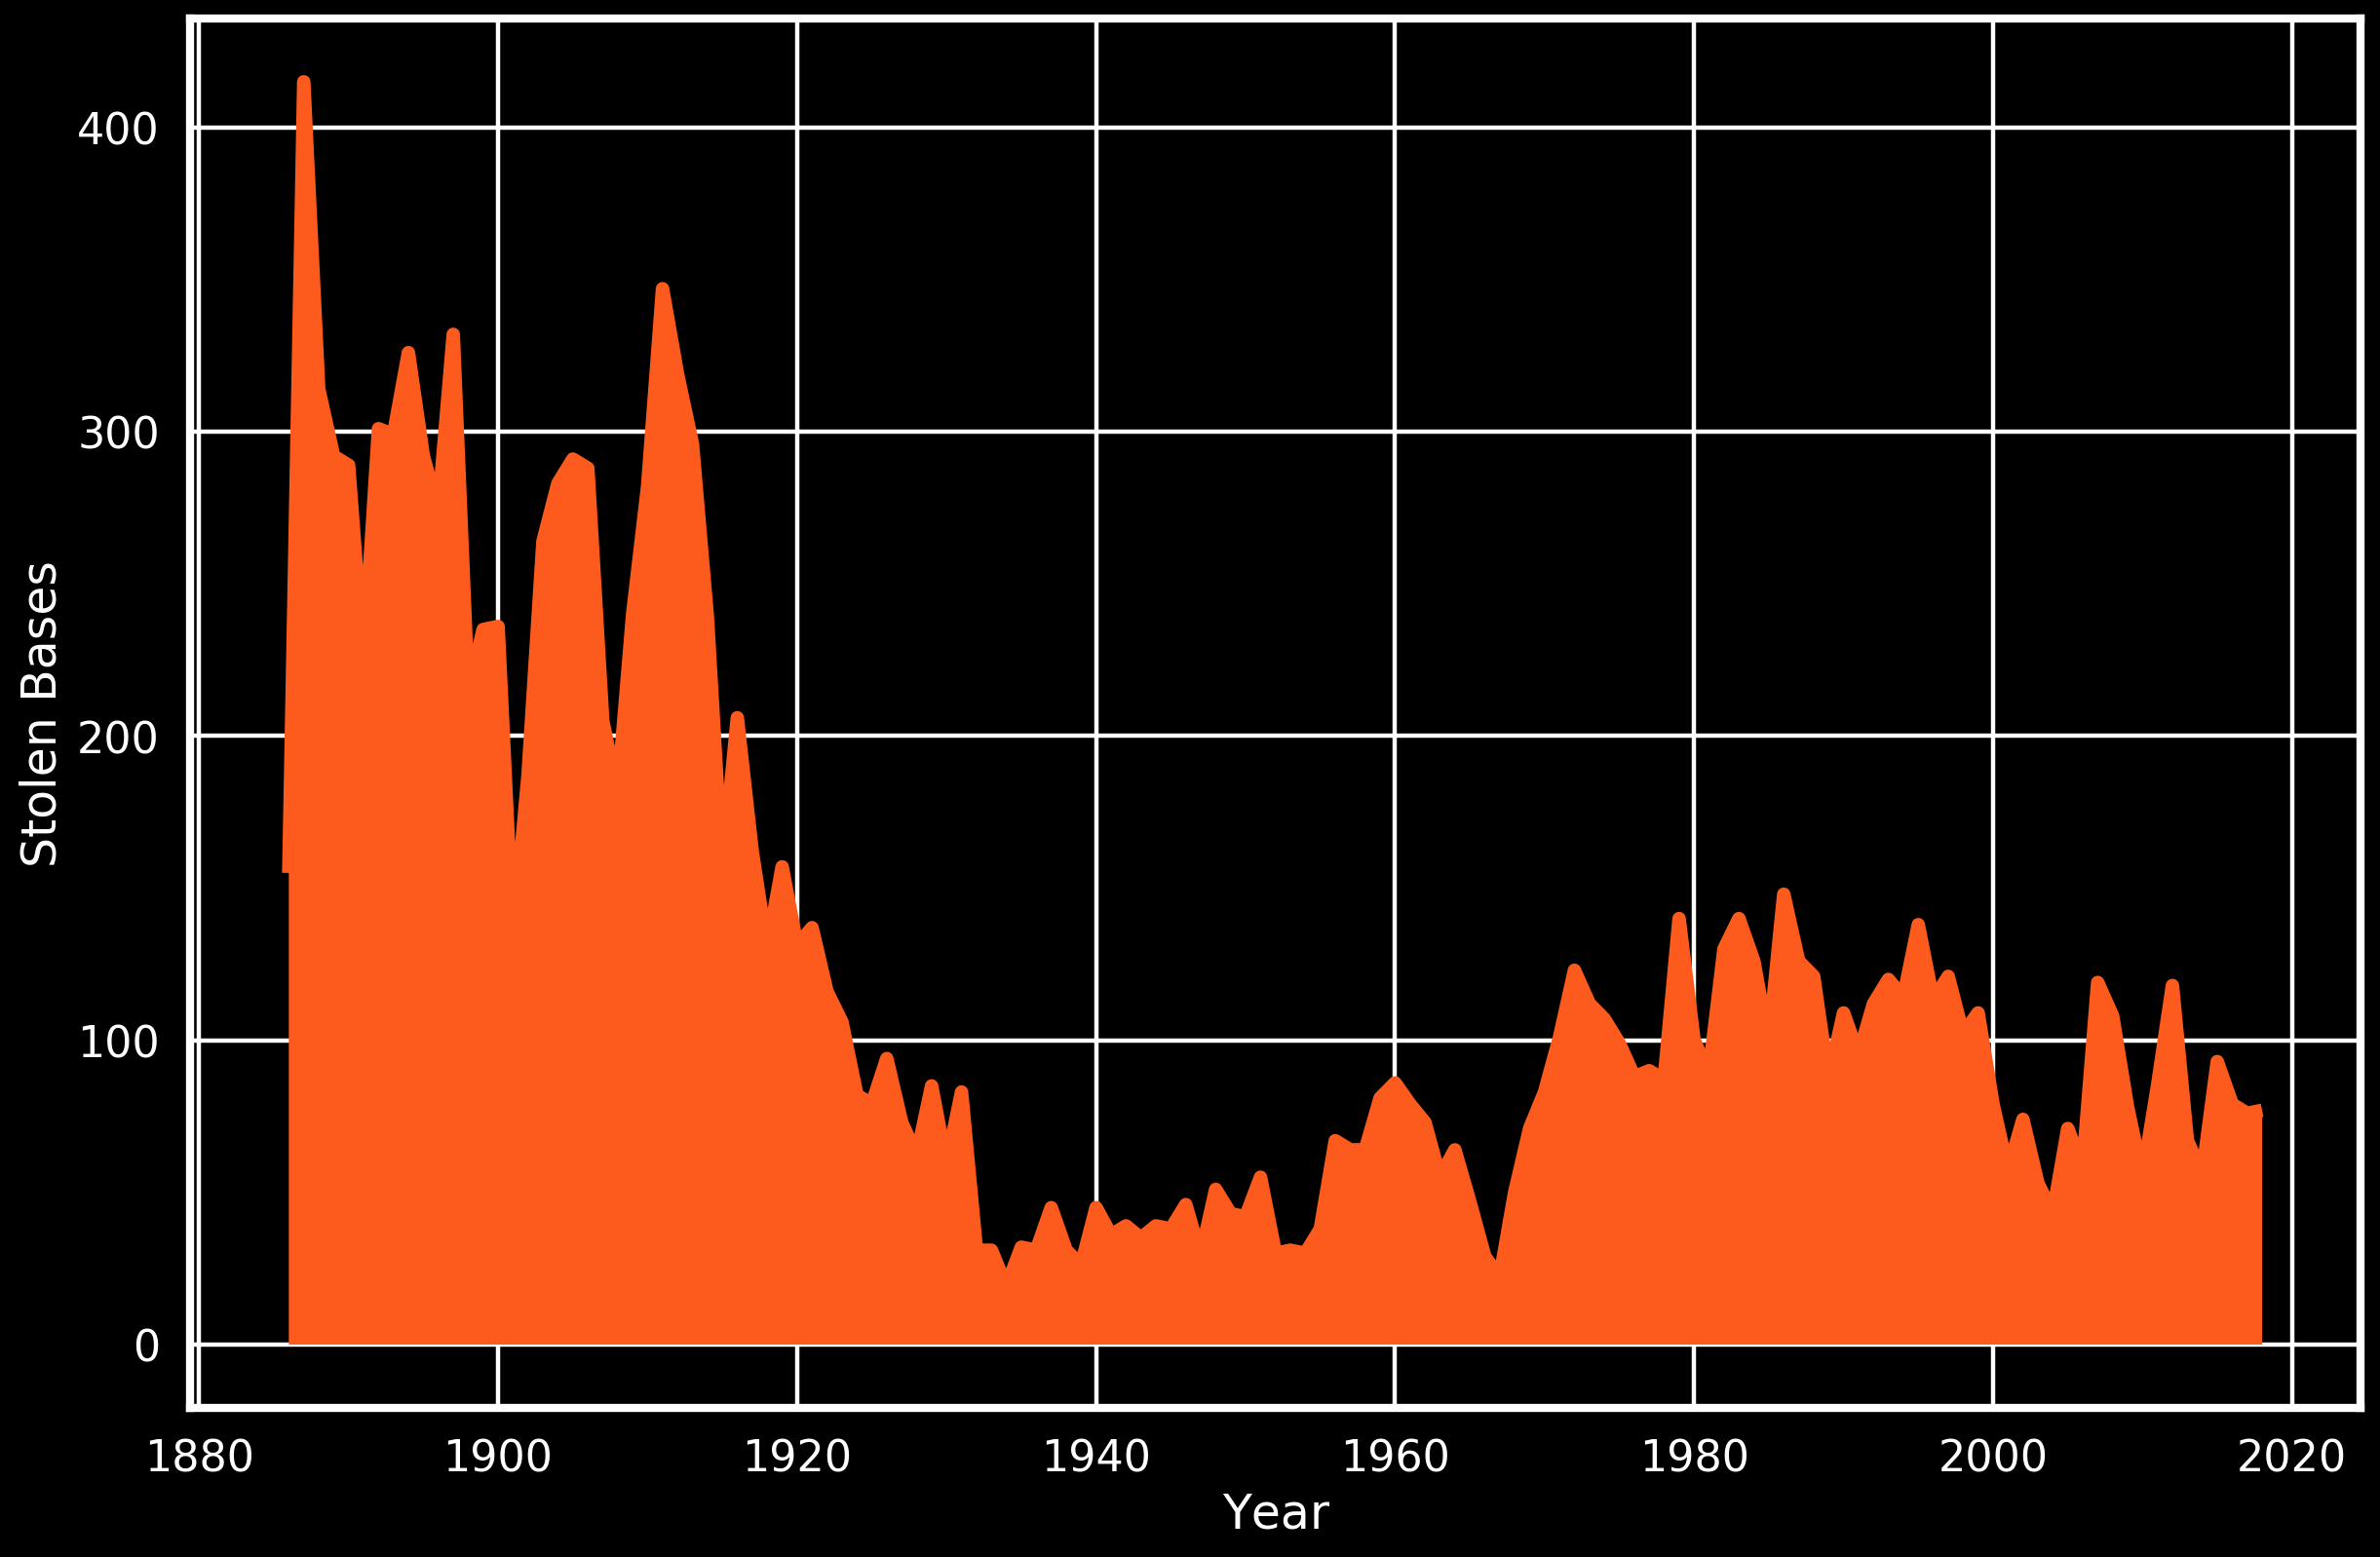

In [24]:
sfgplot(sfg['yearID'], sfg['SB'], "Year", "Stolen Bases")

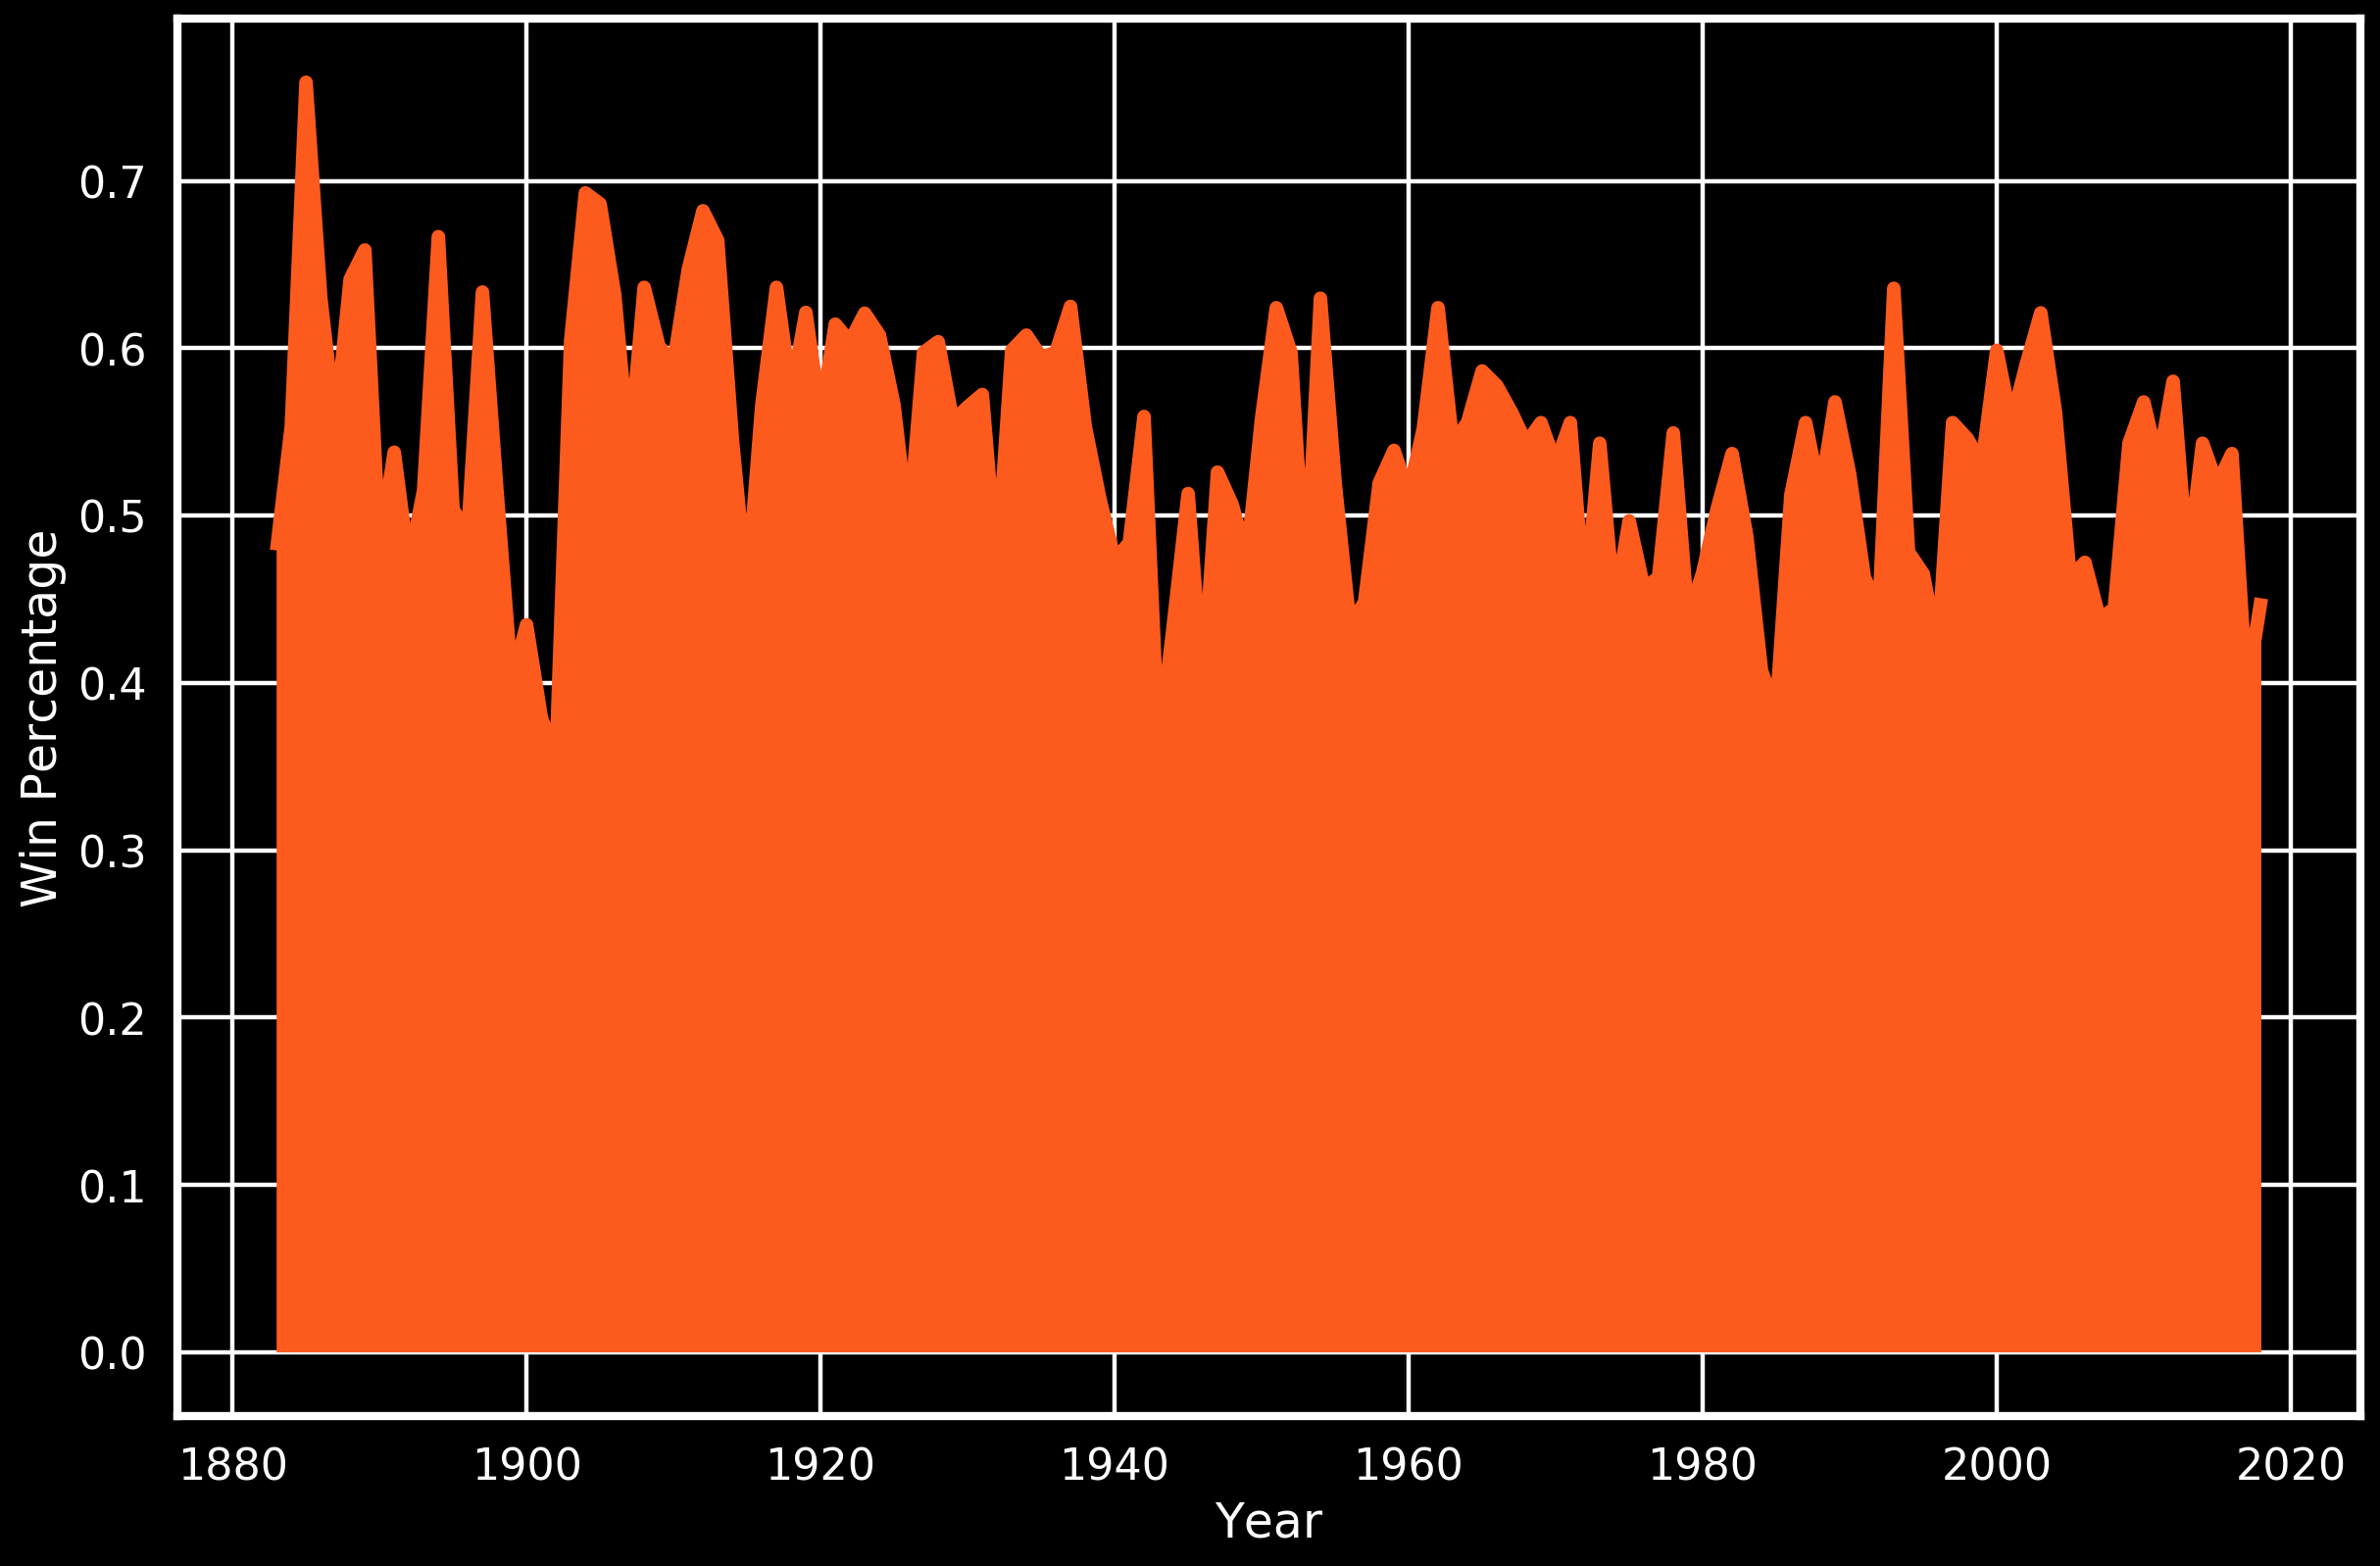

In [25]:
sfgplot(sfg['yearID'], sfg['Win_Pct'], "Year", "Win Percentage")

In what place (rank) did the Giants finish at the end of the season?

(array([26., 31., 26., 17., 17.,  8.,  3.,  6.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

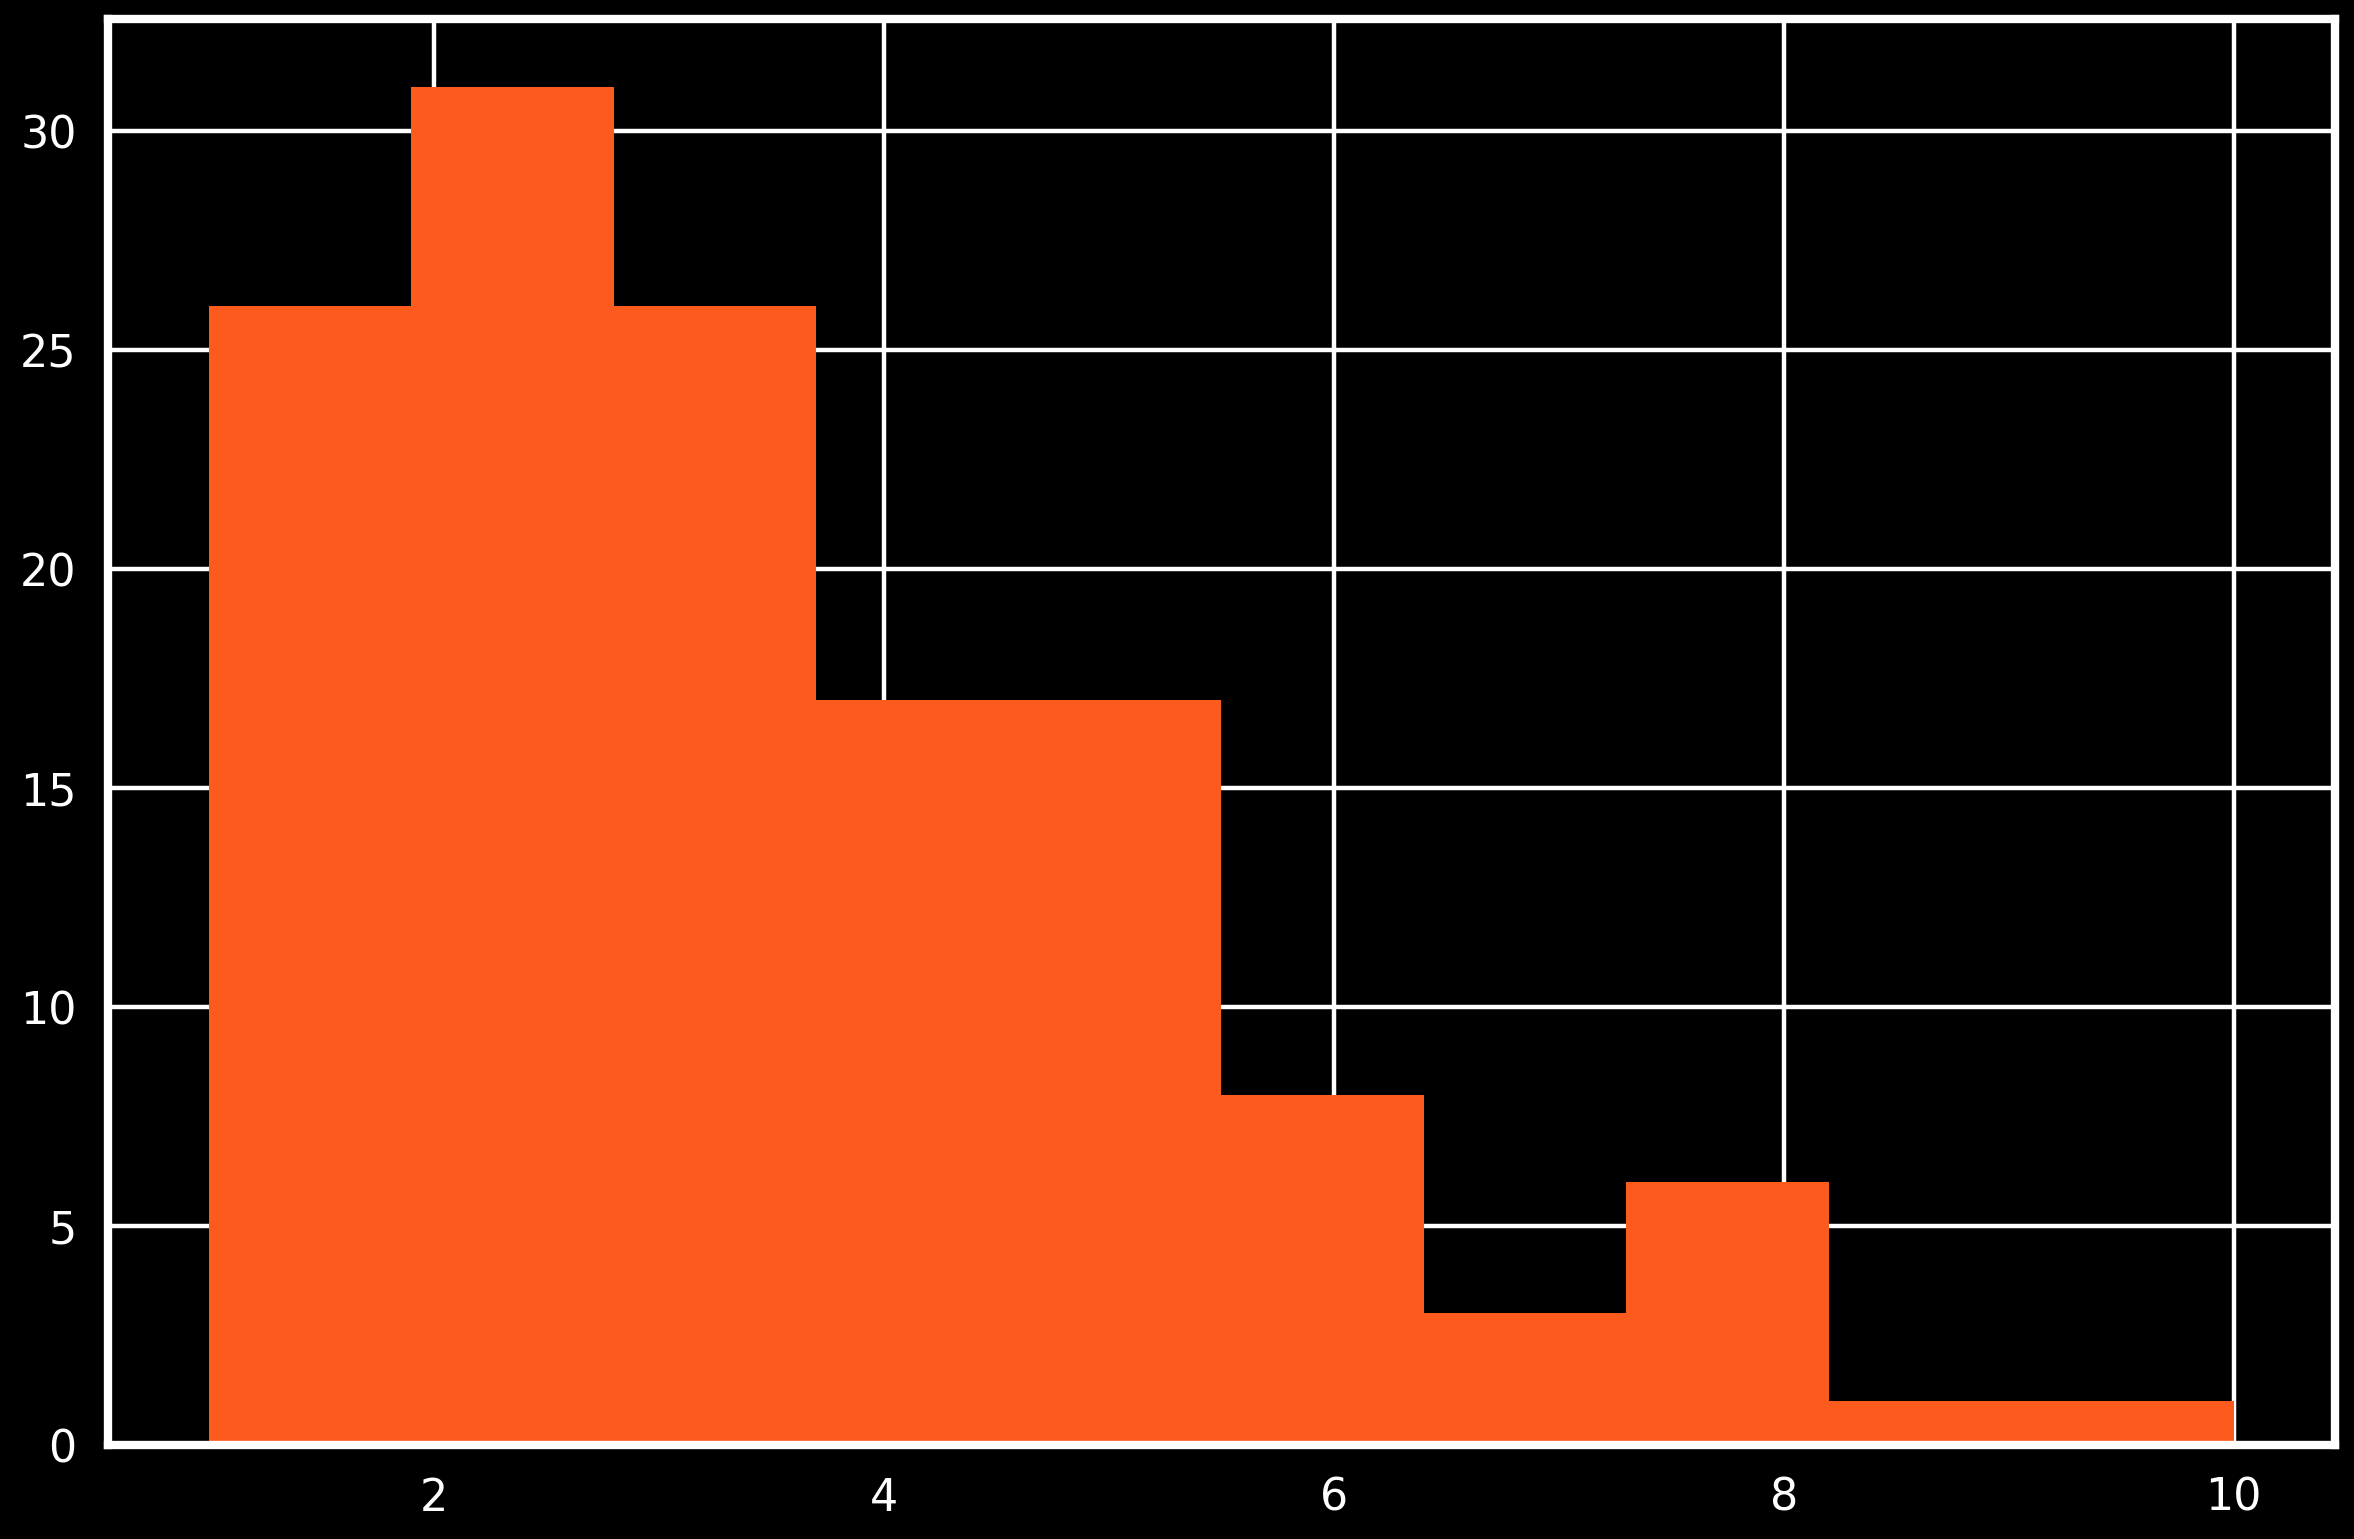

In [26]:
plt.hist(sfg['Rank'], color='#FD5A1E', bins=10)

How many World Series titles do the Giants have?

In [27]:
sfg[sfg['WSWin'] == "Y"]['yearID'].count()

10

In [28]:
sfg[sfg['WSWin'] == "Y"]['yearID']

215     1888
231     1889
455     1905
727     1921
743     1922
919     1933
1256    1954
2649    2010
2709    2012
2769    2014
Name: yearID, dtype: int64